# imblearn para desbalanceo de clases: SMOTE

En muchos problemas de _machine learning_, especialmente en clasificación, nos encontramos con conjuntos de datos en los que una clase (llamada **minoritaria**) tiene un número mucho menor de muestras comparada con la otra u otras clases (llamadas **mayoritarias**). Por ejemplo, un escenario clásico es la detección de fraude en tarjetas de crédito: la gran mayoría de las transacciones son legítimas (clase mayoritaria), mientras que las transacciones fraudulentas (clase minoritaria) constituyen un porcentaje muy pequeño.

Cuando los modelos de clasificación se entrenan con datos desbalanceados, pueden inclinarse en exceso a predecir siempre la clase mayoritaria, ya que estadísticamente "aciertan" la mayoría de las veces. Esto puede reducir de forma drástica la capacidad para detectar adecuadamente la clase de interés (a menudo la minoritaria), que en muchos casos es la más importante (p. ej., detectar fraudes, enfermedades, etc.).

**SMOTE** son las siglas de **Synthetic Minority Over-sampling TEchnique**. 

Se trata de una técnica de **_oversampling_** que genera nuevas muestras sintéticas de la clase minoritaria para aumentar su frecuencia en el dataset, con el objetivo de balancear mejor las clases.

**Cómo funciona**:

- Identifica cada muestra de la clase minoritaria y localiza a sus vecinos más cercanos (según una métrica de distancia, típicamente la euclidiana).
- Selecciona de forma aleatoria algunos de estos vecinos y, a partir de ellos, genera nuevos ejemplos **interpolando** entre la muestra original y el vecino.  
    > Esto significa que las características de las nuevas muestras se calculan como un punto situado en la línea que une la muestra original y su vecino.

- De esta manera, no se duplican simplemente las muestras minoritarias (como haría un _Random Oversampling_) sino que se generan ejemplos intermedios (sintéticos), lo que en muchos casos mejora la diversidad de la clase minoritaria y ayuda al modelo a generalizar mejor.

Ejemplos:

* from iblearn.over_sampling import SMOTE
* from iblearn.under_sampling import RandomUnderSampler

In [26]:
# pip install imbalanced-learn

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [28]:
# crear datos desbalanceados para probar SMPTE:

X, y = make_classification(
    n_samples=300, # número total de filas
    n_features=2, # número de columnas en la X
    n_redundant=0, # número de columnas redundantes
    n_clusters_per_class=1,
    n_informative=2,
    weights=[0.95, 0.05], # datos desbalanceados (clasificación binaria)
    class_sep=1,
    random_state=42   
)

print(X[:5])
print(y[:50])
print(np.bincount(y)) # cuenta cuantos 0 y 1 hay (vemos un desbalanceo muy alto)


[[ 0.73324554 -1.43100684]
 [ 1.14555473 -0.82480677]
 [ 0.53798312 -2.05654971]
 [ 1.39457591 -0.18326309]
 [ 0.72012412  0.97723685]]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[285  15]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
print('Tamaño X_train', X_train.shape)
print('Distribución clases train:', np.bincount(y_train))
print('Tamaño X_test', X_test.shape)
print('Distribución clases test:', np.bincount(y_test))

Tamaño X_train (180, 2)
Distribución clases train: [171   9]
Tamaño X_test (120, 2)
Distribución clases test: [114   6]


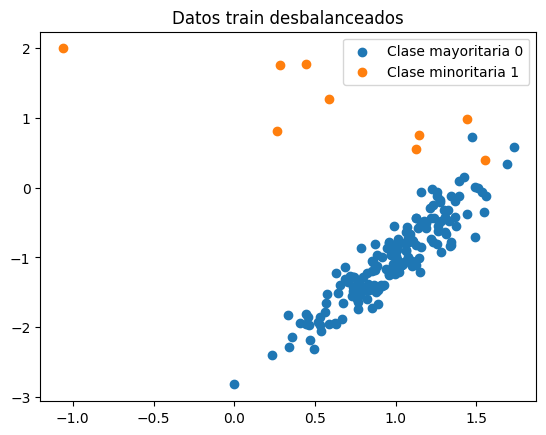

In [30]:
# Mostrar los puntos para la clase 0
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='Clase mayoritaria 0')

# Mostrar los puntos para la clase 1
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='Clase minoritaria 1')
plt.title('Datos train desbalanceados')
plt.legend()

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
#ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       114
           1       1.00      0.67      0.80         6

    accuracy                           0.98       120
   macro avg       0.99      0.83      0.90       120
weighted avg       0.98      0.98      0.98       120



In [32]:
# Con SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Tamaño X_train', X_train.shape)
print('Distribución clases y_train:', np.bincount(y_train))

print('\nTamaño X_train_resampled', X_train_resampled.shape)
print('Distribución clases y_train_resampled:', np.bincount(y_train_resampled))

Tamaño X_train (180, 2)
Distribución clases y_train: [171   9]

Tamaño X_train_resampled (342, 2)
Distribución clases y_train_resampled: [171 171]


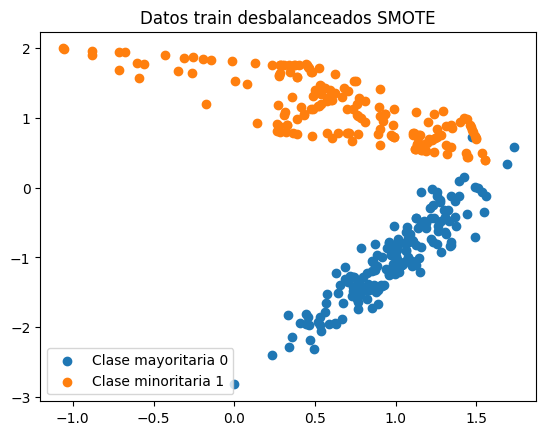

In [33]:
# Mostrar los puntos para la clase 0
plt.scatter(X_train_resampled[y_train_resampled == 0, 0], X_train_resampled[y_train_resampled == 0, 1], label='Clase mayoritaria 0')

# Mostrar los puntos para la clase 1
plt.scatter(X_train_resampled[y_train_resampled == 1, 0], X_train_resampled[y_train_resampled == 1, 1], label='Clase minoritaria 1')
plt.title('Datos train desbalanceados SMOTE')
plt.legend();

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       114
           1       0.83      0.83      0.83         6

    accuracy                           0.98       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.98      0.98      0.98       120



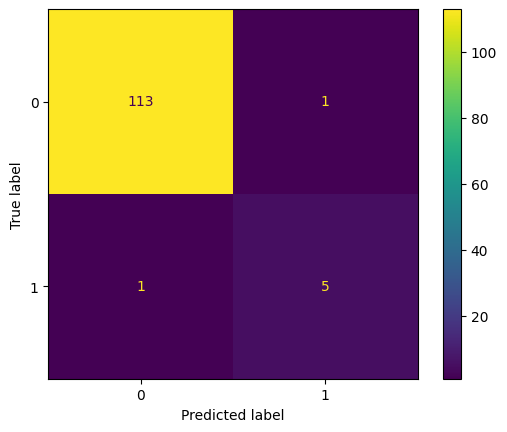

In [34]:
model = LogisticRegression()
# solo cambia el entrenamiento, no la prediccion
model.fit(X_train_resampled, y_train_resampled) # Entrena con datos balanceados por SMOTE
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [35]:
# luego podemos probar los datasets:
# penguins (es multiclase)
# wine

In [36]:
#penguins
import seaborn as sns
df = sns.load_dataset('penguins').dropna() #quitamos los nulos a lo bestia
df.head(1)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


<Axes: xlabel='species', ylabel='count'>

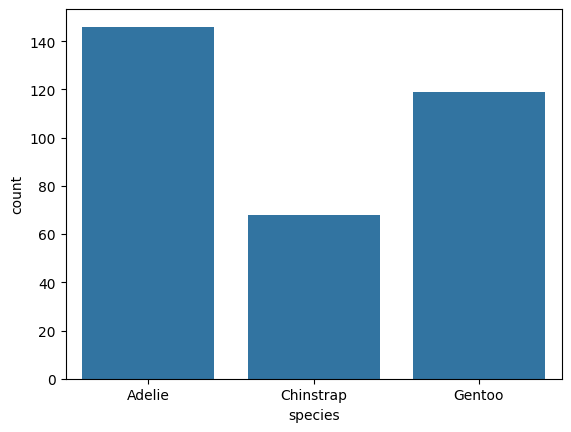

In [37]:
sns.countplot(df, x='species')

<Axes: xlabel='island', ylabel='count'>

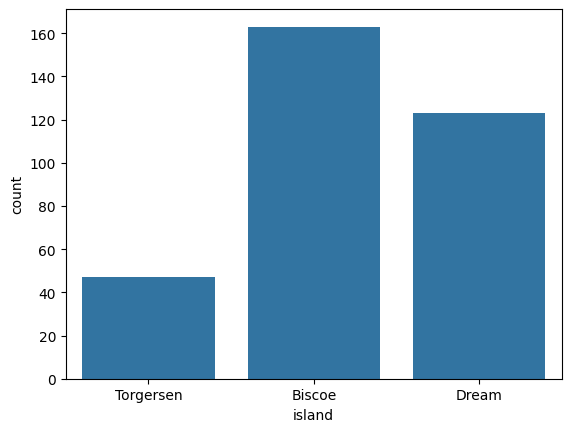

In [38]:
sns.countplot(df, x='island')

<Axes: xlabel='sex', ylabel='count'>

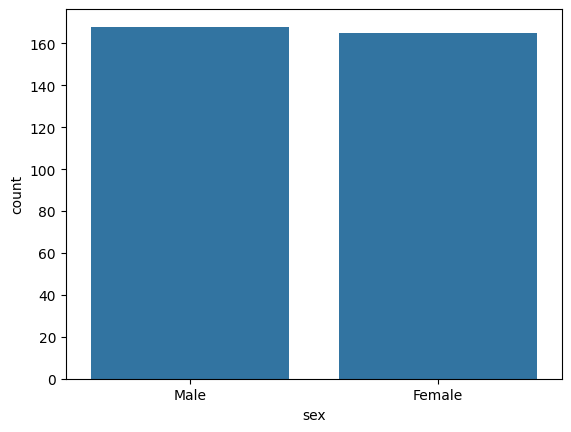

In [39]:
sns.countplot(df, x='sex')

In [40]:
print(df['island'].value_counts()) # island tiene más desbalanceo
print(df['species'].value_counts())

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


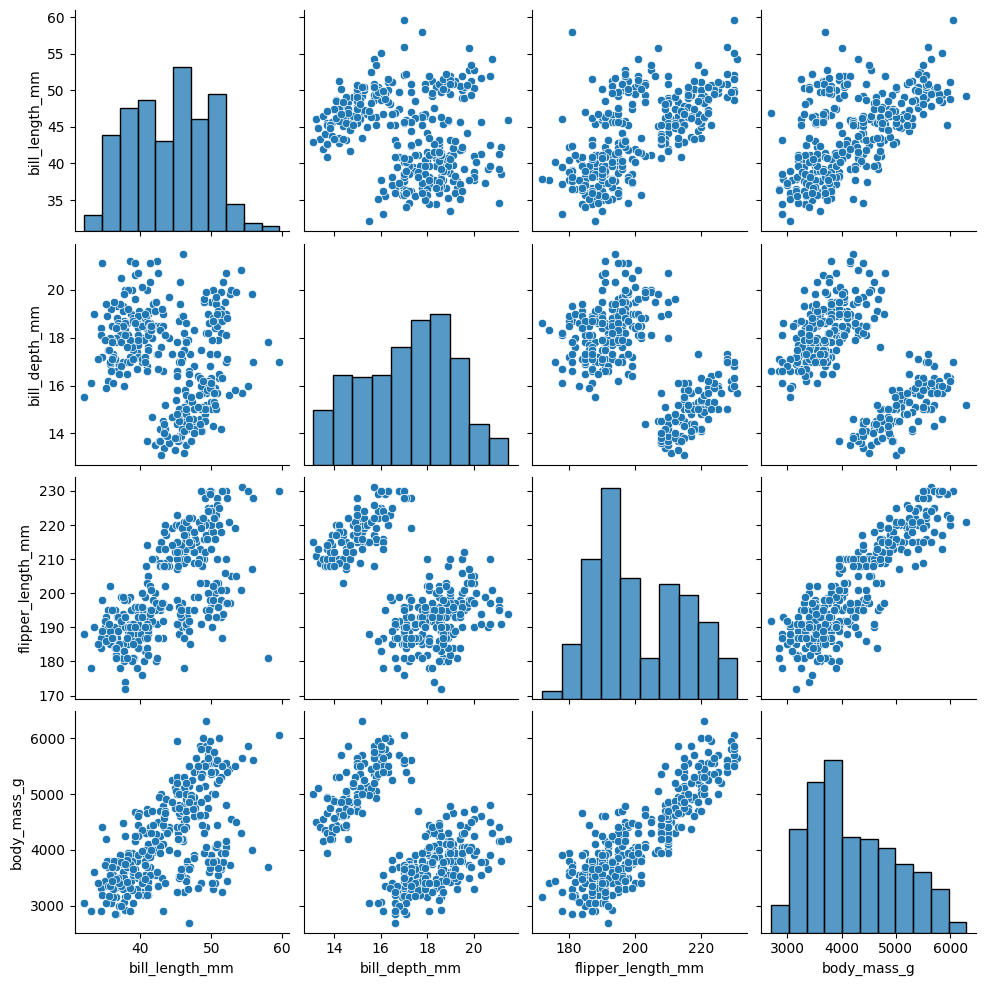

In [41]:
sns.pairplot(df)

In [42]:
import pandas as pd
X = df.drop('island', axis=1)
X = pd.get_dummies(X)
y = df['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [43]:
# sin SMOTE
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        49
           1       0.67      0.78      0.72        37
           2       0.40      0.14      0.21        14

    accuracy                           0.72       100
   macro avg       0.62      0.59      0.58       100
weighted avg       0.69      0.72      0.70       100



c:\Users\carol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# con SMOTE
smote = SMOTE(k_neighbors=9)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=5000)
model.fit(X_train_resampled, y_train_resampled) 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # Se observa mejora en todas las métricas

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        49
           1       1.00      0.65      0.79        37
           2       0.34      0.79      0.48        14

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.71       100
weighted avg       0.86      0.75      0.78       100



c:\Users\carol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SMOTE con Pipelines

Usa pipelines de **imblearn** en lugar de sklearn ya que permiten modificar tanto la "X" como la "y" y pasarlas a la siguiente fase, en cambio scikit solo modifica la "X" de una fase a otra.

In [45]:
# Con pipeline
#IMPORTANTE, usa imblearn.pipeline en lugar de scikit.pipeline
from imblearn.pipeline import Pipeline, make_pipeline

pipeline = make_pipeline(
    LogisticRegression(max_iter=5000)    # solo el modelo
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.84      0.81        49
           1       0.67      0.78      0.72        37
           2       0.40      0.14      0.21        14

    accuracy                           0.72       100
   macro avg       0.62      0.59      0.58       100
weighted avg       0.69      0.72      0.70       100



c:\Users\carol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
pipeline = make_pipeline(
    SMOTE(k_neighbors=9), # hace que tarde más
    LogisticRegression(max_iter=5000)    
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        49
           1       1.00      0.65      0.79        37
           2       0.33      0.79      0.47        14

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.71       100
weighted avg       0.87      0.75      0.78       100



c:\Users\carol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.discriminant_analysis import StandardScaler

pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(k_neighbors=9),
    LogisticRegression(max_iter=5000)    
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        49
           1       0.84      0.70      0.76        37
           2       0.39      0.79      0.52        14

    accuracy                           0.77       100
   macro avg       0.74      0.77      0.73       100
weighted avg       0.84      0.77      0.79       100



## dataset wine

probar más ejemplos para practicar

In [48]:
# wine: https://archive.ics.uci.edu/dataset/109/wine
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0


<Axes: xlabel='target', ylabel='count'>

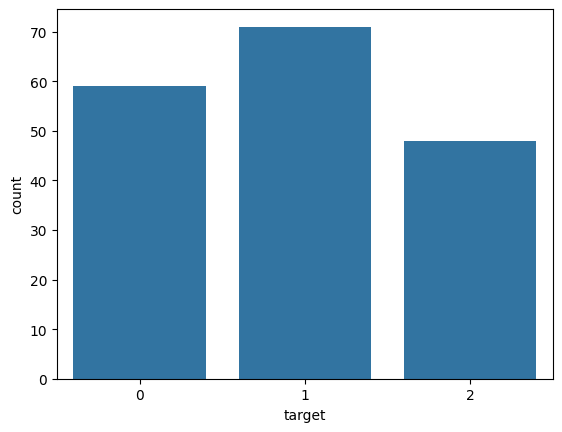

In [49]:
sns.countplot(df, x='target')

In [50]:
# con Standard Scaler